# 📊 Insurance Cost Prediction using Linear Regression

> _This notebook implements a linear regression model to predict insurance costs based on various features like age, BMI, smoking status, etc._

---

### 👤 Intern Details

- **Intern Name**: **Ahmed Islam**  
- **Department**: Artificial Intelligence
- **Designation**: AI Intern  
- **Organization**: IR Solutions  

---

### 🎯 Project Overview

The goal of this project is to build a machine learning model using **Linear Regression** (via **PyTorch**) to predict yearly medical insurance charges.

#### 🔍 Key Steps:

- 📥 **Load and explore** the insurance dataset  
- 🧹 **Preprocess** data (handle categorical variables, encode features)  
- 🛠️ **Build** a linear regression model using **PyTorch**  
- 🏋️ **Train and evaluate** the model using MSE loss  
- 📈 **Make predictions** and visualize results  
- 💾 **Save** the trained model for future use  



In [13]:
# importing all the necessary libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pickle
import warnings
warnings.filterwarnings('ignore')


In [14]:
def load_insurance_data(file_path):
    """Load the insurance dataset from CSV file.

    Args:
        file_path (str): Path to the CSV file

    Returns:
        pd.DataFrame: Loaded insurance dataset
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None

# Load the dataset
insurance_df = load_insurance_data("/content/insurance_data.csv") # define the path of the dataset

Dataset loaded successfully.


In [15]:
# checking the top 5 rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# checking the shape of the dataset
print("Shape of the dataset is: ",insurance_df.shape)

Shape of the dataset is:  (1338, 7)


**It's mean that we have a 1338 rows and the 7 columns in the dataset.**

In [17]:
# overall info about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
# checking for the null values in the dataset
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [19]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


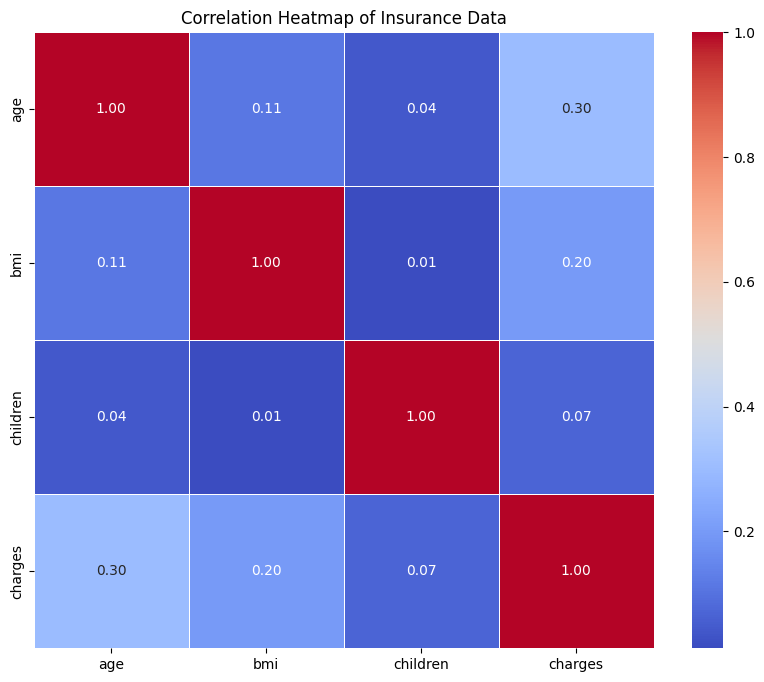

In [20]:
corr_matrix = insurance_df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Insurance Data')
plt.show()

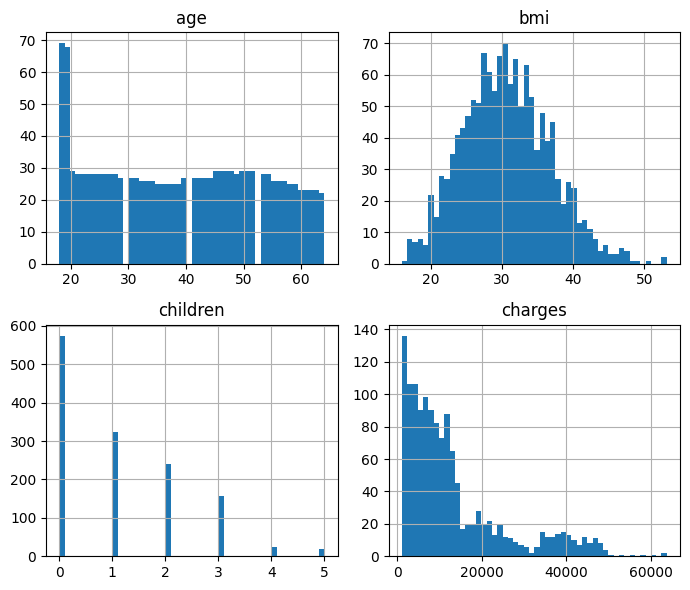

In [21]:
#data distribution for numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
insurance_df[numerical_features].hist(figsize=(7, 6), bins = 50)
plt.tight_layout()
plt.show()

**Data Distribution Insights**

*  Age:-> Mostly even, but some binning gaps
*   Bmi:-> Normal Distributed
*   Children:-> data is imbalanced and skewed to 0-2 children
* Charges: Highly right skewed we can imporve it by applying Log1p() transformation





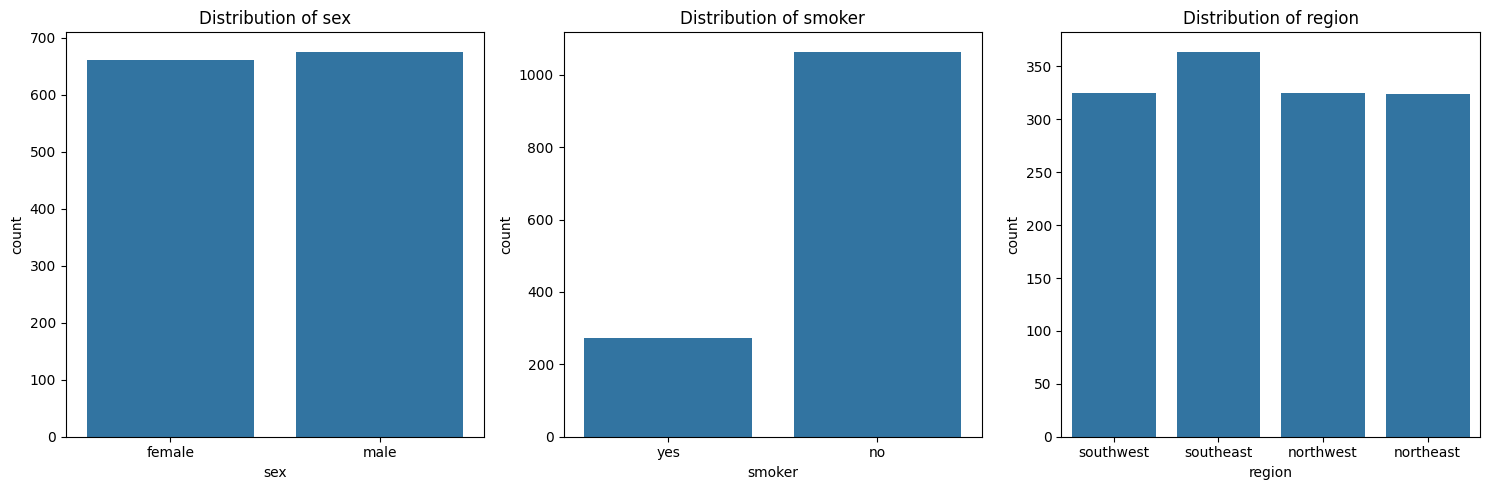

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['sex', 'smoker', 'region']):
  sns.countplot(x=col, data=insurance_df, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()





*   Sex: balanced
* smooker: Imbalanced (many non-smookers)
*   region: Balanced





1. How many rows and columns are in the dataset? List the column names.


In [23]:
print("Number of rows in the dataset ",len(insurance_df))
print("Number of columns in the dataset ",len(insurance_df.columns))
print("Column names in the dataset ",insurance_df.columns)

Number of rows in the dataset  1338
Number of columns in the dataset  7
Column names in the dataset  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


# Data Preprocessing

2. Implement the customize dataset function using your name (at least 5 characters). Explain how the function modifies the dataset.

In [24]:
# Encoding catergorical columns

def preprocess_ahmed(df):
    df = insurance_df.copy()
    categorical_cols = ['sex', 'smoker', 'region']
    # Encode categorical columns
    for col in categorical_cols:
        df[col] = pd.factorize(df[col])[0]

    # log tranform target to reduce skewness in target varaible
    df['charges'] = np.log1p(df['charges'])

    return df

df = preprocess_ahmed(insurance_df)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,9.734236
1,18,1,33.770,1,1,1,7.453882
2,28,1,33.000,3,1,1,8.400763
3,33,1,22.705,0,1,2,9.998137
4,32,1,28.880,0,1,2,8.260455


**You can also check that the sex, smoker and region are encoded in the form of 0 1 2.**

3. Identify the input, categorical, and output columns. Why is it necessary to convert categorical columns to numerical codes?

In [26]:
# identifying features and the target variable

input_cols = ['age','sex','bmi','children','smoker','region']
target_col = ['charges']


**Machine learning models and PyTorch only work with numerical data. Categorical variables like "male" or "southeast" must be converted to numbers so that the model can learn from them.**

4. Convert the dataset to PyTorch tensors using DataFrame to arrays. What are the shapes of the input and target arrays?

In [27]:
# converting the data types into a Numpy array
# why? because Pytorch models require input tensors to be in a numeric Numpy format(not Pandas).

X = df[input_cols].values
y = df[target_col].values.reshape(-1,1)

In [28]:
print("Input shape:", X.shape)
print("Target shape:", y.shape)

Input shape: (1338, 6)
Target shape: (1338, 1)


In [29]:
# standardizing input Features and Target variable

x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [30]:
X_scaled = x_scaler.fit_transform(X).astype(np.float32)
y_scaled = y_scaler.fit_transform(y).astype(np.float32)

In [31]:
X_scaled

array([[-1.4387642 , -1.0105187 , -0.45332   , -0.9086137 , -1.9705867 ,
        -1.3439046 ],
       [-1.5099654 ,  0.9895908 ,  0.5096211 , -0.0787672 ,  0.5074631 ,
        -0.43849456],
       [-0.79795355,  0.9895908 ,  0.38330686,  1.5809257 ,  0.5074631 ,
        -0.43849456],
       ...,
       [-1.5099654 , -1.0105187 ,  1.0148782 , -0.9086137 ,  0.5074631 ,
        -0.43849456],
       [-1.2963619 , -1.0105187 , -0.7978134 , -0.9086137 ,  0.5074631 ,
        -1.3439046 ],
       [ 1.5516857 , -1.0105187 , -0.26138797, -0.9086137 , -1.9705867 ,
         0.4669155 ]], dtype=float32)

In [32]:
y_scaled

array([[ 0.6913853],
       [-1.7898613],
       [-0.7595624],
       ...,
       [-1.8519213],
       [-1.6250329],
       [ 1.2851735]], dtype=float32)

# Dataset Spliting

5. Split the dataset into training and validation sets with val_percent = 0.15. What are the sizes of the training and validation sets?

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=42)

In [34]:
print("Training Size: ", X_train.shape[0])
print("Testing Size: ", X_val.shape[0])

Training Size:  1137
Testing Size:  201


6. Create a DataLoader with batch size = 32. Print the first batch of inputs and targets.

In [35]:
# creating dataset and data loader

class InsuranceDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = torch.from_numpy(inputs)
        self.targets = torch.from_numpy(targets)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

train_ds = InsuranceDataset(X_train, y_train)
val_ds = InsuranceDataset(X_val, y_val)

In [36]:
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)

In [37]:
# Displaying one batch
for xb,yb in train_dl:
  print("Sample input batch: ",xb)
  print('Sample Target batch: ', yb)
  break

Sample input batch:  tensor([[-1.2964, -1.0105, -2.1758, -0.0788,  0.5075, -1.3439],
        [-1.2252, -1.0105,  0.8754, -0.9086,  0.5075, -1.3439],
        [-1.5100,  0.9896, -0.1039, -0.0788,  0.5075, -0.4385],
        [-1.4388, -1.0105,  0.3669, -0.9086,  0.5075, -1.3439],
        [-0.0859,  0.9896, -1.5655,  1.5809,  0.5075, -0.4385],
        [ 0.5549,  0.9896,  0.8886, -0.0788, -1.9706, -0.4385],
        [ 0.0565,  0.9896,  1.8089, -0.9086,  0.5075, -0.4385],
        [-0.9404,  0.9896, -2.1315, -0.9086,  0.5075,  0.4669],
        [-1.5100, -1.0105,  1.0149, -0.9086,  0.5075, -0.4385],
        [ 0.7685,  0.9896,  0.2685, -0.0788, -1.9706,  1.3723],
        [-0.2995,  0.9896,  1.4840,  2.4108,  0.5075,  1.3723],
        [-1.5100,  0.9896, -0.9003, -0.9086, -1.9706,  1.3723],
        [ 0.2701, -1.0105,  2.5487, -0.9086, -1.9706, -0.4385],
        [ 0.6973, -1.0105, -0.5846, -0.0788,  0.5075, -1.3439],
        [ 0.6973, -1.0105, -1.1185,  1.5809, -1.9706,  1.3723],
        [ 0.8397,  

# Linear Regression Model

7. Define the InsuranceModel class. Why is nn.Linear used, and what are the input and output sizes?

In [38]:
# Linear Regression Model


class InsuranceModel(nn.Module):
    def __init__(self, input_size: int):
        super(InsuranceModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


input_size = len(input_cols)
model = InsuranceModel(input_size)

* nn.Linear is used to define a linear regression layer, which maps inputs to output with weights and bias.

* Input Size: 6

* Output Size: 1 (predicted insurance charge)

# Model Training

8. Train the model for 500 epochs with lr=1e-3. Plot the validation loss over epochs. What trend do you observe?

In [39]:
def train_model(model, train_dl, val_dl, epochs=300, lr=1e-3, weight_decay=1e-5):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    val_losses = []
    best_val_loss = float('inf')
    patience = 20
    wait = 0

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        for xb, yb in train_dl:
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()

            # ✅ Clip gradients to avoid exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            optimizer.zero_grad()

            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / len(train_dl)

        # ✅ Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_loss = sum(criterion(model(xb), yb).item() for xb, yb in val_dl) / len(val_dl)

        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # ✅ Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"⏹️ Early stopping at epoch {epoch+1}")
                break

    return val_losses




# training the model
val_losses = train_model(model, train_dl, val_dl)



Epoch [1/300], Train Loss: 1.1892, Validation Loss: 1.1308
Epoch [2/300], Train Loss: 1.0845, Validation Loss: 1.0205
Epoch [3/300], Train Loss: 0.9675, Validation Loss: 0.9204
Epoch [4/300], Train Loss: 0.8713, Validation Loss: 0.8300
Epoch [5/300], Train Loss: 0.7894, Validation Loss: 0.7481
Epoch [6/300], Train Loss: 0.7166, Validation Loss: 0.6746
Epoch [7/300], Train Loss: 0.6443, Validation Loss: 0.6103
Epoch [8/300], Train Loss: 0.5954, Validation Loss: 0.5542
Epoch [9/300], Train Loss: 0.5414, Validation Loss: 0.5022
Epoch [10/300], Train Loss: 0.4957, Validation Loss: 0.4560
Epoch [11/300], Train Loss: 0.4564, Validation Loss: 0.4156
Epoch [12/300], Train Loss: 0.4272, Validation Loss: 0.3798
Epoch [13/300], Train Loss: 0.3970, Validation Loss: 0.3512
Epoch [14/300], Train Loss: 0.3702, Validation Loss: 0.3238
Epoch [15/300], Train Loss: 0.3523, Validation Loss: 0.3014
Epoch [16/300], Train Loss: 0.3324, Validation Loss: 0.2830
Epoch [17/300], Train Loss: 0.3163, Validation Lo

Trend Observed:

The validation loss decreases gradually, indicating that the model is learning.
I used Early stopping to avoid overfitting.

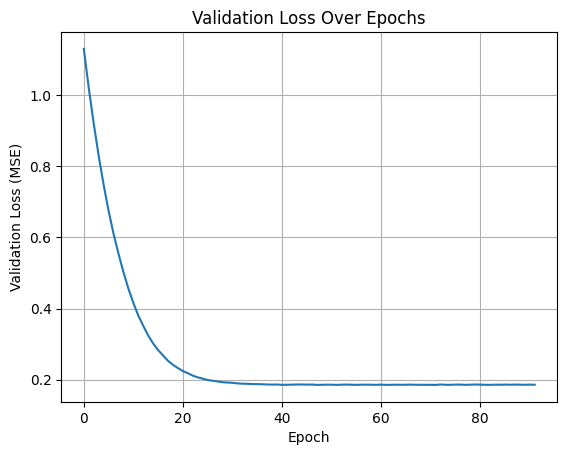

In [40]:
# ploting the loss curve
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss (MSE)')
plt.title('Validation Loss Over Epochs')
plt.grid(True)
plt.show()

In [41]:
# Evaluate the model on the validation set and calculate R2 score
model.eval()
with torch.no_grad():
    y_pred_val = model(val_ds.inputs).numpy()
    y_true_val = val_ds.targets.numpy()
    r2 = r2_score(y_true_val, y_pred_val)

print(f"R2 Score on the validation set: {r2:.4f}")

R2 Score on the validation set: 0.8106


9. Make predictions for three validation samples using predict_single. Compare predictions with actual targets.

In [42]:
def predict_single(model, sample):
    model.eval()
    with torch.no_grad():
        sample_tensor = torch.tensor(sample, dtype=torch.float32).unsqueeze(0)
        pred = model(sample_tensor).numpy()
        return y_scaler.inverse_transform(pred)[0][0]

In [43]:
# show predictions

print('Sample Predictions:')
for i in range(3):
  raw_input = X_val[i]
  true_val = y_scaler.inverse_transform(y-y_val[i].reshape(-1, 1))[0][0]
  pred_val = predict_single(model, raw_input)
  print(f"Input: {raw_input}, Predicted: {pred_val}, Actual: {true_val}")

Sample Predictions:
Input: [ 0.41246668 -1.0105187  -0.9003412   0.75107926  0.5074631   1.3723255 ], Predicted: 9.107536315917969, Actual: 18.0281667136922
Input: [-0.22834402 -1.0105187  -0.10554571 -0.9086137   0.5074631   0.4669155 ], Predicted: 8.623079299926758, Actual: 18.573376149975232
Input: [ 1.7652893 -1.0105187 -0.6198251 -0.9086137 -1.9705867  0.4669155], Predicted: 11.119495391845703, Actual: 16.85733044936811


10. Save the model using pickle. Why is model saving important for deployment?

* Enables deployment without retraining

* Allows reloading the model for future use

* Makes integration into APIs or applications easier

In [44]:
# Saving the trained model to a file
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))